In [5]:
import os
import pandas as pd

directory0 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/ADReSSo21/diagnosis/train/audio/ad'
file_count_21AD = len([f for f in os.listdir(directory0) if os.path.isfile(os.path.join(directory0, f))])
directory1 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/ADReSSo21/diagnosis/train/audio/cn'
file_count_21CN = len([f for f in os.listdir(directory1) if os.path.isfile(os.path.join(directory1, f))])
directory2 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/ADReSS20/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/ad'
file_count_20AD = len([f for f in os.listdir(directory2) if os.path.isfile(os.path.join(directory2, f))])
directory3 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/ADReSS20/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cn'
file_count_20CN = len([f for f in os.listdir(directory3) if os.path.isfile(os.path.join(directory3, f))])
directory4 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/All_ADReSS_o/train/ad'
file_count_allAD = len([f for f in os.listdir(directory4) if os.path.isfile(os.path.join(directory4, f))])
directory5 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/All_ADReSS_o/train/cn'
file_count_allCN = len([f for f in os.listdir(directory5) if os.path.isfile(os.path.join(directory5, f))])

print("Training data information")
print("number of 2020 AD", file_count_20AD)
print("number of 2020 CN", file_count_20CN)
print("number of 2021 AD", file_count_21AD)
print("number of 2021 CN", file_count_21CN)
print("number of all AD", file_count_allAD)
print("number of all CN", file_count_allCN)
print("total n = ", file_count_allAD + file_count_allCN)


import csv
from collections import Counter

# Assume `csv_file_path` is the path to your CSV file
csv_file_path = '/home/gamorten/privacyLLM/Healthcare-Chatbots/groundtruth/combined_labels.csv'
csv_file_path1 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/groundtruth/transformed_2020Labels.csv'
csv_file_path2 = '/home/gamorten/privacyLLM/Healthcare-Chatbots/groundtruth/task1.csv'

# Use a Counter to count the occurrences of 'AD' and 'CN'
counts = Counter()
counts1 = Counter()
counts2 = Counter()

# Read the CSV file
with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    for _, status in reader:
        counts[status] += 1

with open(csv_file_path1, mode='r') as file:
    reader = csv.reader(file)
    for _, status in reader:
        counts1[status] += 1

with open(csv_file_path2, mode='r') as file:
    reader = csv.reader(file)
    for _, status in reader:
        counts2[status] += 1

filecount_all_test_ad = counts['AD']
filecount_all_test_cn = counts['CN']
filecount_20_test_ad = counts1['AD']
filecount_20_test_cn = counts1['CN']
filecount_21_test_ad = counts2['AD']
filecount_21_test_cn = counts2['CN']

# Now `counts` contains the number of occurrences
# For example, you can print out the counts
print("Testing data information")
print(f"Number of 2020 AD: {counts1['AD']}")
print(f"Number of 2020 CN: {counts1['CN']}")
print(f"Number of 2021 AD: {counts2['AD']}")
print(f"Number of 2021 CN: {counts2['CN']}")
print(f"Number of all AD: {counts['AD']}")
print(f"Number of all CN: {counts['CN']}")
print(f"Total n = {filecount_all_test_ad + filecount_all_test_cn}")



Training data information
number of 2020 AD 54
number of 2020 CN 54
number of 2021 AD 87
number of 2021 CN 79
number of all AD 141
number of all CN 133
total n =  274
Testing data information
Number of 2020 AD: 24
Number of 2020 CN: 24
Number of 2021 AD: 35
Number of 2021 CN: 36
Number of all AD: 59
Number of all CN: 60
Total n = 119


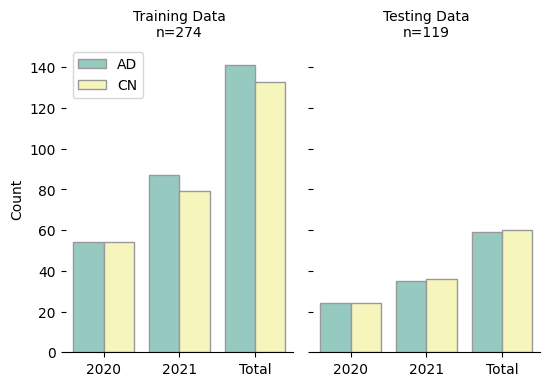

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation
data = {
    'Category': ['AD', 'CN', 'AD', 'CN', 'AD', 'CN', 'AD', 'CN', 'AD', 'CN', 'AD', 'CN'],
    'Year': ['2020', '2020', '2021', '2021', 'Total', 'Total'] * 2,
    'Count': [54, 54, 87, 79, 141, 133, 24, 24, 35, 36, 59, 60],
    'Dataset': ['Training', 'Training', 'Training', 'Training', 'Training', 'Training',
                'Testing', 'Testing', 'Testing', 'Testing', 'Testing', 'Testing']
}

df = pd.DataFrame(data)

# Faceted barplot
g = sns.catplot(
    data=df, kind='bar',
    x='Year', y='Count', hue='Category',
    col='Dataset', aspect=.7,
    height=4, palette='Set3', edgecolor='.6',
    legend_out=False
)

g.set_titles("{col_name} Data")
g.set_axis_labels("", "Count")
g.set(ylim=(0, max(df['Count']) + 10))
g.despine(left=True)
g.legend.set_title('')

# Assuming 'n' values are known, replace these with actual calculations/logic as required
n_values = {'Training': 274, 'Testing': 119}

# Adding custom annotations below each title
for ax, dataset_name in zip(g.axes.flat, n_values.keys()):
    n = n_values[dataset_name]
    # Adjust text position to be below the title
    # Note: Adjusting the vertical position 'y' might be necessary depending on your figure size
    ax.title.set_text(f'{ax.title.get_text()}\nn={n}')

plt.show()
